Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

Cargar dataset

In [39]:
# Cargar el dataset de Blue Jays
file_id = "1oyBHATkS0-tB9N2LsVMSrQw0AYsM4mYN"
file_path = f"https://drive.google.com/uc?id={file_id}"
blue_jays = pd.read_csv('file_path')

FileNotFoundError: [Errno 2] No such file or directory: 'file_path'

Filtrado de columnas

In [32]:
# Filtrar las columnas a utilizar para el análisis bivariado
variables = ["bill_depth_mm", "bill_width_mm", "bill_length_mm", "head_length_mm", "body_mass_g", "skull_size_mm"]
data_filtrada = blue_jays[variables]

NameError: name 'blue_jays' is not defined

Combinanciones de las variables

NameError: name 'data_filtrada' is not defined

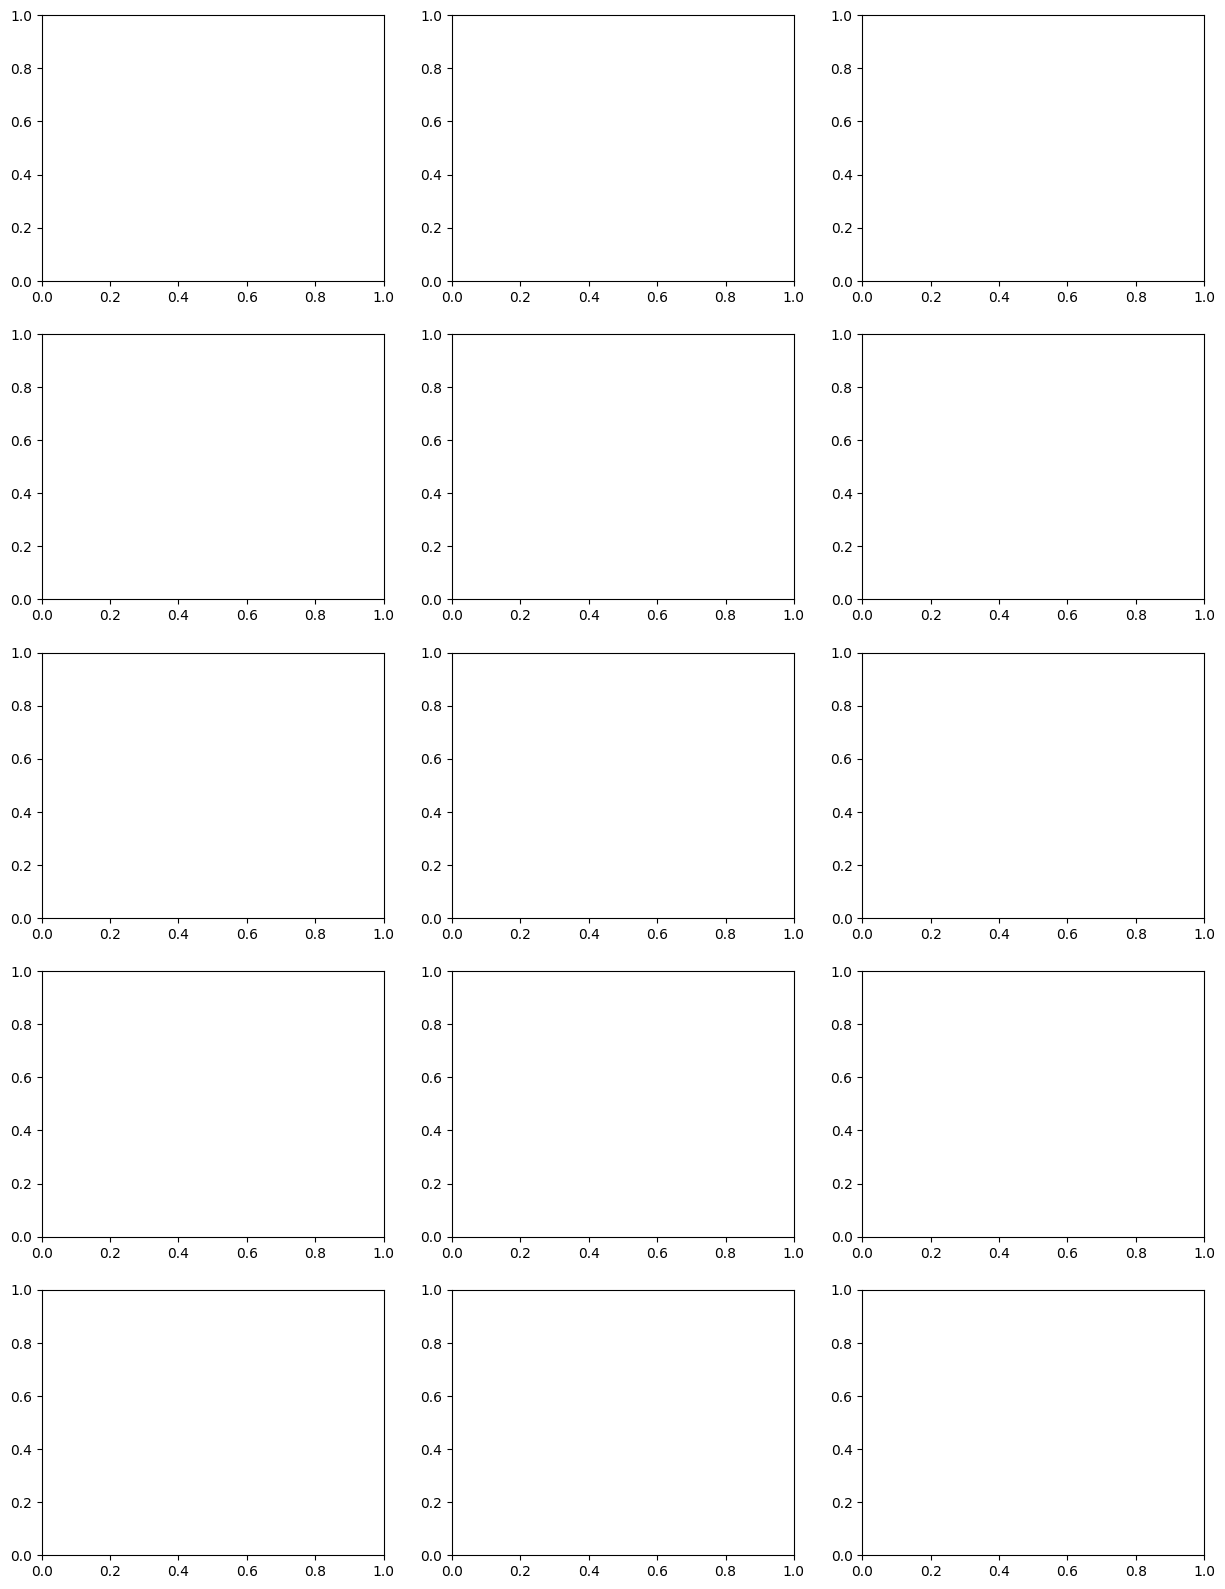

In [43]:
# Generar todas las combinaciones únicas de las variables
combinaciones_unicas = list(itertools.combinations(variables, 2))

# Calcular el número de gráficos a dibujar
num_graficos = len(combinaciones_unicas)
columnas = 3  # Número fijo de columnas para la visualización
filas = (num_graficos // columnas) + (num_graficos % columnas > 0)

# Crear la figura y los ejes para los gráficos
fig, ejes = plt.subplots(nrows=filas, ncols=columnas, figsize=(15, filas * 4))
ejes = ejes.flatten()  # Convertir a una lista unidimensional

# Generar los gráficos de dispersión para cada combinación de variables
for i, (x, y) in enumerate(combinaciones_unicas):
    sns.scatterplot(data=data_filtrada, x=x, y=y, alpha=0.6, ax=ejes[i])
    ejes[i].set_title(f"Relación entre {x} y {y}")
    ejes[i].set_xlabel(x)
    ejes[i].set_ylabel(y)

# Ocultar ejes vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(ejes)):
    ejes[j].axis('off')

plt.tight_layout()
plt.show()

Estandarizar datos

In [41]:
# Estandarizar los datos filtrados
data_filtrada_estandarizada = (data_filtrada - data_filtrada.mean()) / data_filtrada.std()


NameError: name 'data_filtrada' is not defined

Calcular los valores

In [42]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(data_filtrada_estandarizada, rowvar=False)

# Calcular valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Mostrar resultados de la matriz de covarianza, valores y vectores propios
print("Matriz de Covarianza:")
print(cov_matrix)
print("\nValores propios:")
print(eigenvalues)
print("\nVectores propios:")
print(eigenvectors)

# Calcular la varianza explicada por cada componente
varianza_explicada = eigenvalues / np.sum(eigenvalues)

# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Determinar cuántos componentes son necesarios para el 90% de la varianza
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1

# Mostrar resultados
print("Varianza explicada por cada componente:")
print(varianza_explicada)
print("\nVarianza acumulada:")
print(varianza_acumulada)
print(f"\nNúmero de componentes necesarios para el 90% de la varianza: {n_componentes_90}")



NameError: name 'data_filtrada_estandarizada' is not defined